In [1]:
"""
U = 20 * np.random.normal(size=SIZE)
X = np.random.normal(size=SIZE) + U
A = np.array([100.0 if x > 10 else 0.0 for x in X])
Y = U + A + np.random.normal(size=SIZE)
"""
from libmcci.model import CausalModel

In [2]:
m = CausalModel.load_all()

In [4]:
m.exposure

'X'

In [6]:
m.outcome

'Y'

In [7]:
m.latents

['U']

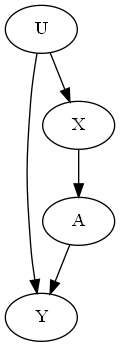

In [9]:
m.plot()

In [14]:
ids = m.identify()
ids

[('A', 'Y', [['X']]), ('X', 'A', [[]])]

In [28]:
admissables = [ids[1].select(0), ids[0].select(0)]
admissables

[('X', 'A', []), ('A', 'Y', ['X'])]

In [29]:
data = m.get_data("default")
data.columns = ["X", "Y", "A"]
data.head()

,X,Y,A
0,-1.734620,-0.465077,0.0
1,-19.080140,-17.395745,0.0
2,-19.366569,-17.951446,0.0
3,-2.085311,-2.396232,0.0
4,-6.924210,-8.997876,0.0


In [30]:
from sklearn import svm
import pandas as pd

In [31]:
estimators = m.estimate([svm.SVR(kernel="rbf"), svm.SVR(kernel="rbf")], admissables, [data, data])

In [33]:
test_x = pd.DataFrame({'X': [20.], 'Y': [120.], 'A': [100.]})
res = m.use(estimators, admissables, test_x[["X"]])
res

,X,A,Y
0,20.0,92.203826,117.93445
